In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("data/suicide_rates.csv")
file2 = pd.read_csv("data/population/pop_totals.csv")

# preview file data using .head()
file.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [2]:
file2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [3]:
countries = file['country'].unique()
#countries[100]


In [4]:
len(countries)

101

In [5]:
np.sort(file['year'].unique())

x_years = np.linspace(2006,2015,10)
x_years

array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015.])

In [6]:
file['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [7]:
file['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [8]:
max_suicide = file.groupby('suicides/100k pop').aggregate(np.max)
max_suicide

,country,year,sex,age,suicides_no,population,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
suicides/100k pop,,,,,,,,,,,
0.00,Uruguay,2016,male,75+ years,0,8673303,Uruguay2014,0.942,"997,007,926",126352,Silent
0.02,Thailand,2011,male,5-14 years,1,5821000,Thailand1994,0.651,"416,878,162,441",8906,Millenials
0.03,United Kingdom,2010,male,5-14 years,1,3778962,United Kingdom2010,0.906,"926,884,816,754",42486,Millenials
0.04,Spain,2015,male,5-14 years,2,5126281,Spain2015,0.874,"612,939,685,081",36869,Millenials
0.05,United Kingdom,2011,male,5-14 years,2,3949849,United Kingdom2003,0.870,"906,853,273,138",36289,Millenials
...,...,...,...,...,...,...,...,...,...,...,...
182.32,Republic of Korea,2010,male,75+ years,1152,631853,Republic of Korea2010,NaN,"1,094,499,338,703",22994,Silent
185.37,Republic of Korea,2011,male,75+ years,1276,688365,Republic of Korea2011,NaN,"1,202,463,682,634",25157,Silent
187.06,Suriname,2012,male,75+ years,10,5346,Suriname2012,0.711,"4,980,000,000",10227,Silent


In [76]:
suicide_rates = file.drop(labels = 'gdp_per_capita ($)', axis = 1)
suicide_rates = suicide_rates.drop(labels = 'country-year', axis = 1)
suicide_rates = suicide_rates.drop(labels = 'HDI for year', axis = 1)
suicide_rates = suicide_rates.drop(labels = 'age', axis =1)
suicide_rates = suicide_rates.drop(labels = 'sex', axis =1)
suicide_rates = suicide_rates.drop(labels = 'population', axis =1)

In [186]:
suicide_rates

,country,year,suicides_no,suicides/100k pop,gdp_for_year ($),generation
0,Albania,1987,21,6.71,"2,156,624,900",Generation X
1,Albania,1987,16,5.19,"2,156,624,900",Silent
2,Albania,1987,14,4.83,"2,156,624,900",Generation X
3,Albania,1987,1,4.59,"2,156,624,900",G.I. Generation
4,Albania,1987,9,3.28,"2,156,624,900",Boomers
...,...,...,...,...,...,...
27815,Uzbekistan,2014,107,2.96,"63,067,077,179",Generation X
27816,Uzbekistan,2014,9,2.58,"63,067,077,179",Silent
27817,Uzbekistan,2014,60,2.17,"63,067,077,179",Generation Z
27818,Uzbekistan,2014,44,1.67,"63,067,077,179",Generation Z


In [187]:
#suicide_10= suicide_rates[suicide_rates['year'] >= 2006] and suicide_rates[suicide_rates['year'] <=2016]
suicide_10=suicide_rates[(suicide_rates['year'] >= 2006) & (suicide_rates['year'] <= 2015)]
suicide_10

,country,year,suicides_no,suicides/100k pop,gdp_for_year ($),generation
204,Albania,2006,0,0.00,"8,992,642,349",Millenials
205,Albania,2006,0,0.00,"8,992,642,349",Generation X
206,Albania,2006,0,0.00,"8,992,642,349",Boomers
207,Albania,2006,0,0.00,"8,992,642,349",Millenials
208,Albania,2006,0,0.00,"8,992,642,349",Silent
...,...,...,...,...,...,...
27815,Uzbekistan,2014,107,2.96,"63,067,077,179",Generation X
27816,Uzbekistan,2014,9,2.58,"63,067,077,179",Silent
27817,Uzbekistan,2014,60,2.17,"63,067,077,179",Generation Z
27818,Uzbekistan,2014,44,1.67,"63,067,077,179",Generation Z


In [178]:
#printing generational suicide data for the past 10 years

generational_suicide_10 = suicide_10.groupby("generation").sum("suicides_no")
generational_suicide_10 = generational_suicide_10.drop(labels = 'year', axis =1)
generational_suicide_10 = generational_suicide_10.drop(labels = 'suicides/100k pop', axis =1)
generational_suicide_10

,suicides_no
generation,
Boomers,636436
Generation X,676467
Generation Z,15906
Millenials,443141
Silent,528922


In [78]:
global_suicide_10 = suicide_10.groupby("year").sum()
global_suicide_10

,suicides_no,suicides/100k pop
year,,
2006,233361,12166.01
2007,233408,12410.15
2008,235447,12145.84
2009,243487,12176.04
2010,238702,11843.99
2011,236484,11367.84
2012,230160,11101.91
2013,223199,10663.64
2014,222984,10306.73


In [79]:
y_sui_total = global_suicide_10["suicides_no"]
y_sui_totals = np.array(y_sui_total)
list(y_sui_totals)


[233361,
 233408,
 235447,
 243487,
 238702,
 236484,
 230160,
 223199,
 222984,
 203640]

In [80]:
#file2['Year']
world = file2.loc[259][-15:-5]
world_pop = world.transpose()
list(world_pop)

[6592734559.0,
 6674203697.0,
 6757020825.0,
 6839574233.0,
 6921877071.0,
 7002880914.0,
 7085790438.0,
 7169675197.0,
 7254292848.0,
 7339076654.0]

In [150]:
percent_suicide = []
for i in y1:
    for j in y2:
        if y1.index(i) == y2.index(j):
            new_percent = i/j * 100
            percent_suicide.append(new_percent)
percent_suicide

[0.003539669281564351,
 0.0034971662627695196,
 0.0034844794192268897,
 0.003559973058340516,
 0.003448515446771938,
 0.0033769530412437344,
 0.003248190897174823,
 0.0031130977884938626,
 0.0030738213175592497,
 0.002774735972937557]

In [151]:
avg_glb_percent = np.mean(percent_suicide)
avg_glb_percent

0.003311660248608244

In [155]:
data = []
for i in y1:
    for j in y2:
        for k in percent_suicide:
            if y1.index(i) == y2.index(j) == percent_suicide.index(k):
                data.append([i,j,k])
data

[[233361, 6592734559.0, 0.003539669281564351],
 [233408, 6674203697.0, 0.0034971662627695196],
 [235447, 6757020825.0, 0.0034844794192268897],
 [243487, 6839574233.0, 0.003559973058340516],
 [238702, 6921877071.0, 0.003448515446771938],
 [236484, 7002880914.0, 0.0033769530412437344],
 [230160, 7085790438.0, 0.003248190897174823],
 [223199, 7169675197.0, 0.0031130977884938626],
 [222984, 7254292848.0, 0.0030738213175592497],
 [203640, 7339076654.0, 0.002774735972937557]]

In [156]:
glb_sui = pd.DataFrame(data, index = x_years, columns = ['No. of Suicides', 'Global Population', 'Percentage of the Population'])
glb_sui

,No. of Suicides,Global Population,Percentage of the Population
2006.0,233361,6.592735e+09,0.003540
2007.0,233408,6.674204e+09,0.003497
2008.0,235447,6.757021e+09,0.003484
2009.0,243487,6.839574e+09,0.003560
2010.0,238702,6.921877e+09,0.003449
2011.0,236484,7.002881e+09,0.003377
2012.0,230160,7.085790e+09,0.003248
2013.0,223199,7.169675e+09,0.003113
2014.0,222984,7.254293e+09,0.003074
2015.0,203640,7.339077e+09,0.002775


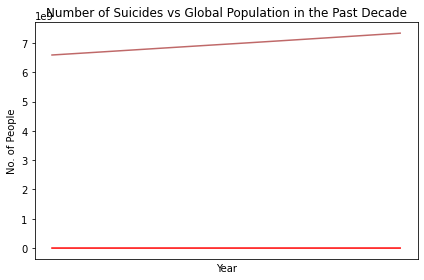

In [138]:
#Bar graph depicting the number of suicides per year from 2006-2015
ax, fig = plt.subplots(sharex=True,sharey=True)


plt.title("Number of Suicides vs Global Population in the Past Decade")
plt.xlabel("Year")
plt.ylabel("No. of People")
plt.xticks(range(2006,2016,1))
#plt.yticks(range(0,700000000,1000000))
#x-axis values
x_years = np.linspace(2006,2015,10)

#y-axis values
y1 = list(y_sui_totals)
y2 = list(world_pop)


plt.plot(y1, color = 'red')
plt.plot(y2, alpha = .7, color = 'brown')

plt.tight_layout()




#plt.subplot(1,2,1, facecolor='red')
# ax, fig = plt.subplots(1,1,sharex=True,sharey=True)


#plt.bar(years, A, color = 'b', label='A')
#plt.bar(years, increment, color = 'r', bottom = A, label='increment')

#plt.legend()



# ax, fig = plt.subplots(1,1,sharex=True,sharey=True)
# plt.bar(x_years, list(world_pop))


[0.003539669281564351,
 0.0034971662627695196,
 0.0034844794192268897,
 0.003559973058340516,
 0.003448515446771938,
 0.0033769530412437344,
 0.003248190897174823,
 0.0031130977884938626,
 0.0030738213175592497,
 0.002774735972937557]

0.003311660248608244

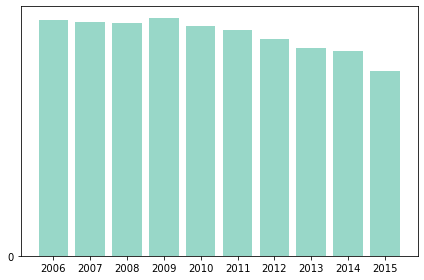

In [130]:
#percent of population has committed suicide
ax, fig = plt.subplots()

plt.bar(x_years, percent_suicide, color = '#7fcdbb', alpha = 0.8)
plt.xticks(range(2006,2016,1))
#plt.yticks(range(0,1,10))
plt.yticks(np.arange(0, max(percent_suicide),5))
#plt.set_size_inches(2,4)
plt.tight_layout()

In [131]:
global_avg = global_suicide_10['suicides_no'].mean()
global_avg

230087.2

In [83]:
y1, y2

([233361,
  233408,
  235447,
  243487,
  238702,
  236484,
  230160,
  223199,
  222984,
  203640],
 [6592734559.0,
  6674203697.0,
  6757020825.0,
  6839574233.0,
  6921877071.0,
  7002880914.0,
  7085790438.0,
  7169675197.0,
  7254292848.0,
  7339076654.0])

In [157]:
suicide_10.groupby("country").sum()

,year,suicides_no,suicides/100k pop
country,,,
Albania,120480,380,178.56
Antigua and Barbuda,193008,2,23.60
Argentina,241260,30391,1135.83
Armenia,241260,683,381.27
Aruba,144612,41,424.24
...,...,...,...
United Arab Emirates,120480,526,78.84
United Kingdom,241260,44071,802.56
United States,241260,387385,1601.48


In [85]:
by_year=suicide_10.groupby('year').aggregate(np.max)
by_year

,country,suicides_no,suicides/100k pop,gdp_for_year ($),generation
year,,,,,
2006,Uruguay,14020,204.92,"989,930,542,279",Silent
2007,Uruguay,13065,172.86,"9,206,301,700",Silent
2008,Uruguay,11848,154.92,"967,199,594",Silent
2009,Uzbekistan,11721,173.86,"97,798,351,648",Silent
2010,Uzbekistan,11767,182.32,"98,381,268,000",Silent
2011,Uzbekistan,11681,185.37,"9,774,316,692",Silent
2012,Uzbekistan,11763,187.06,"93,413,992,956",Silent
2013,Uzbekistan,11396,147.59,"98,478,349,315",Silent
2014,Uzbekistan,11455,124.45,"934,185,915,467",Silent


In [72]:
by_country=by_year.groupby('country').aggregate(np.max)
by_country.head()

,sex,suicides_no,population,suicides/100k pop,gdp_for_year ($),generation
country,,,,,,
Uruguay,male,14020,43805214,204.92,"997,007,926",Silent
Uzbekistan,male,11767,42932194,187.06,"98,478,349,315",Silent


In [ ]:
by_country.groupby("year").sum()

In [ ]:
df.loc[df['team'] == 'A', 'points'].sum()